<a href="https://colab.research.google.com/github/crowell97/ES2245/blob/main/lecture2_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lecture 2, ES2245, Ohio State University
An overview of Python Basics

In [15]:
#Start by importing the math and numpy packages
import math
import numpy

The goal of this notebook is to give you the essence of some commands that are pretty common

The first thing I want to do is create a random matrix of data. I will do this with the numpy.random package. There are a number of potential distributions that I can draw from (https://numpy.org/doc/stable/reference/random/legacy.html). The two I will play with are rand and randn, the former is random values over the interval [0,1] and randn is a normal (Gaussian) distribution with mean 0 and standard deviation 1.

In [16]:
#Variable a will be 1000 data points with rand and variable b is with randn
a = numpy.random.rand(1000,1)
b = numpy.random.randn(1000,1)

In [17]:
#Now lets determine the mean of both of these
print(numpy.mean(a),numpy.mean(b))

0.5044940479719427 -0.009921905591318942


The mean for rand is close to 0.5 and for randn is close to 0. This is in line with the distributions.

In [18]:
#Now we will do the standard deviations
print(numpy.std(a),numpy.std(b))

0.28800924634061104 0.991501748091643


Now we see a standard deviation of 0.28 for rand and roughly 1 for randn.

Next we will plot the histograms of these.

Text(0.5, 1.0, 'random.rand')

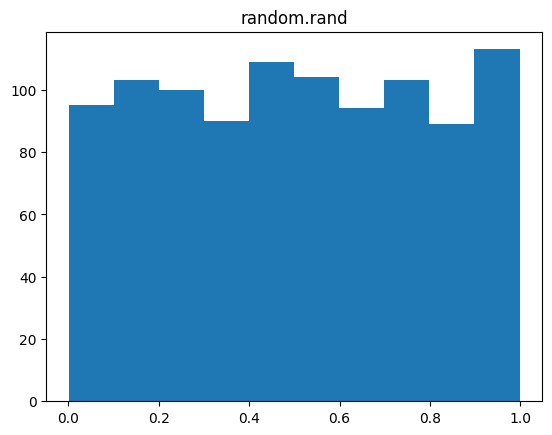

In [19]:
import matplotlib.pylab as plt
plt.hist(a)
plt.title('random.rand')

Text(0.5, 1.0, 'random.randn')

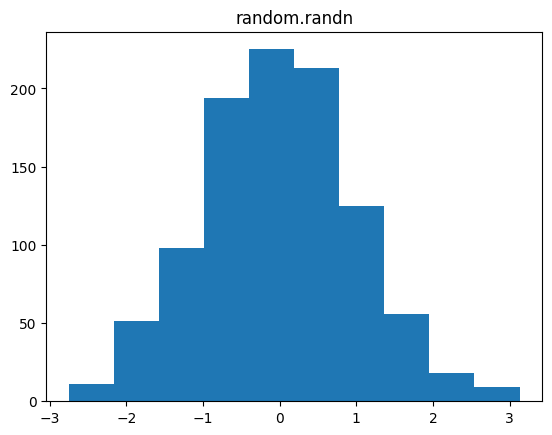

In [20]:
plt.hist(b)
plt.title('random.randn')

Now say we wanted a different mean and standard deviation for our sample normal distribution. For this, you would multiply the distribution by the desired standard deviation and add the desired mean. Lets change it to mean=5 and std=0.2:

Text(0.5, 1.0, 'random.randn, new mean and STD')

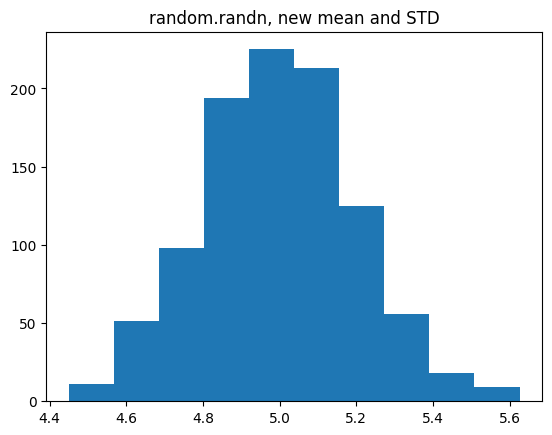

In [21]:
plt.hist(b*0.2+5)
plt.title('random.randn, new mean and STD')

Now lets say we want the rand distribution between -10 and 10. For this, multiply variable a by 20 and subtract 10.

Text(0.5, 1.0, 'random.rand, between -10 and 10')

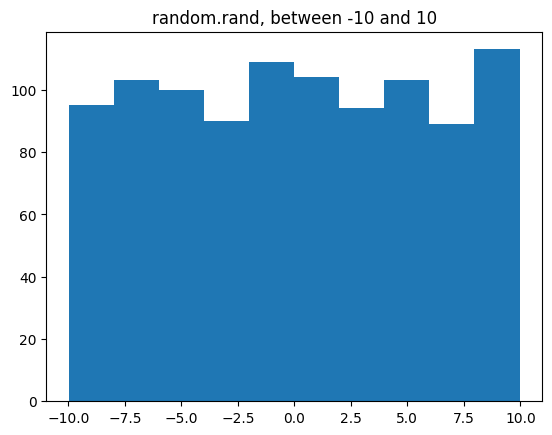

In [22]:
plt.hist(a*20-10)
plt.title('random.rand, between -10 and 10')

Now lets play around with loops and if statements. I am going to form a blank list, then run an if statement within a loop that tests if the randn data is greater than 0.5. If so, append it to the list. We will then plot it at the end

In [26]:
blist = list() #This is the empty list
blen = len(b) #I know I have a single column, so I can use the built in length command
print(blen)

1000


In [29]:
#If you have a matrix with values in 2-D, then you can use numpy.shape
print(numpy.shape(b))

(1000, 1)


In [30]:
#If I only want the first value, the 1000, I would append a bracket with [0]
#A note about indices. In Python, the initial count starts at zero, not 1. So the first value of the array is at [0]
print(numpy.shape(b)[0])

1000


In [31]:
#Now lets make the loop. I will use a for loop here, between index 0 and the length of the vector, blen
for i in range(0,blen):
  if (b[i] >= 0.5):
    blist.append(b[i])

In [32]:
#Now lets see how long this list is.
print(len(blist))

307


Text(0.5, 1.0, 'random.randn, greater than 0.5')

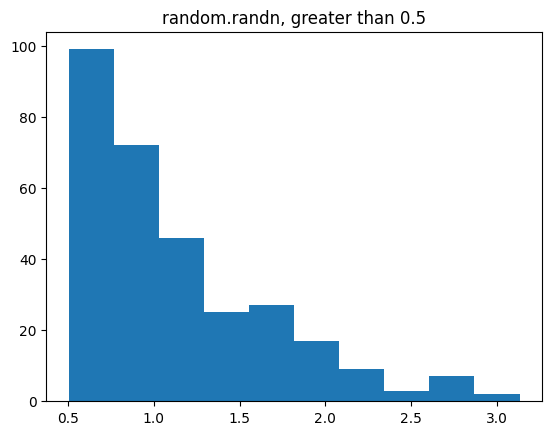

In [34]:
#Now lets plot this histogram
plt.hist(numpy.asarray(blist)) #I convert it to a numpy array because lists arent proper arrays.
plt.title('random.randn, greater than 0.5')

We see only histogram bins above 0.5 are showing up, so our if statement worked. This problem can also be solved with a simple search with numpy.where

In [35]:
a1 = numpy.where(b >= 0.5)[0]
print(len(a1))

307


We get the same length here as the loop and if statement. Lets plot this

Text(0.5, 1.0, 'random.randn, greater than 0.5, using numpy.where')

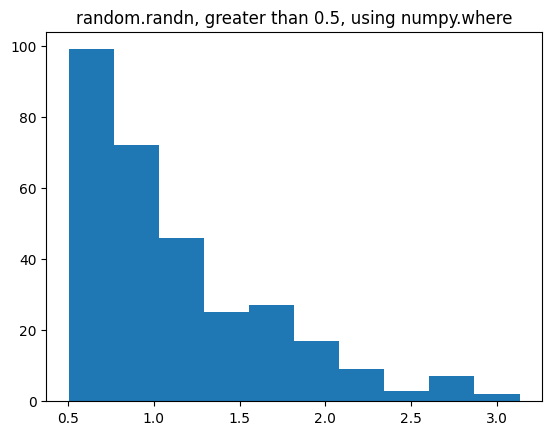

In [36]:
plt.hist(b[a1]) #The indices of the vector are stored in a1, so I can simply call b[a1]
plt.title('random.randn, greater than 0.5, using numpy.where')

Text(0.5, 1.0, 'random.randn, difference with loop and numpy.where')

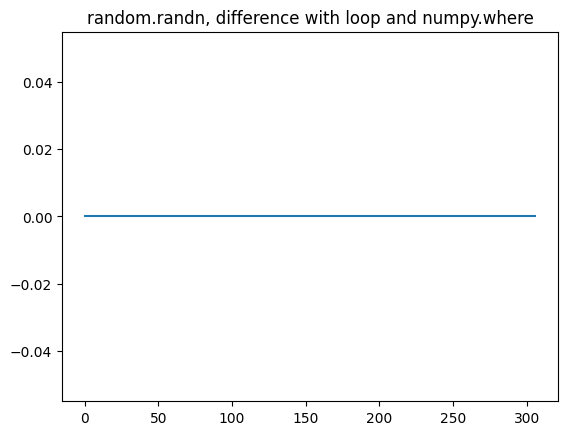

In [37]:
# just to make sure, lets subtract the list from the numpy.where values. I will plot this on a normal x-y plot
plt.plot(b[a1]-numpy.asarray(blist))
plt.title('random.randn, difference with loop and numpy.where')

The above shows the difference is zero for all of the data points here.

I want to take a step back here and note that very basic scalar math commands can be performed with the math package. The most useful value from the math package is pi. We can multiply the value from the math package by an entire numpy array. An example is below:

Text(0.5, 1.0, 'random.randn, multiplied by pi')

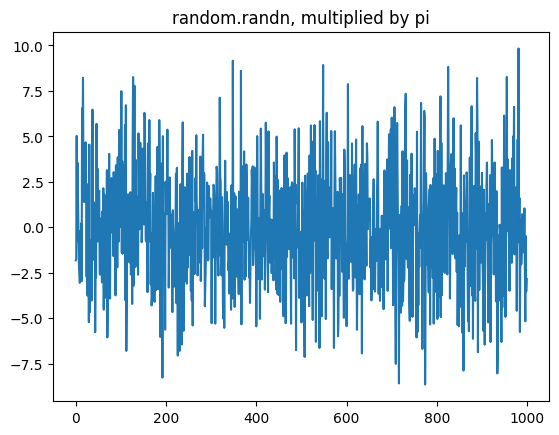

In [59]:
pivalue = math.pi #The value of pi
plt.plot(b*pivalue)
plt.title('random.randn, multiplied by pi')

Now lets read a text file of data points. For this, I loaded some data into my google drive. We can load these data files using the following:

In [50]:
from google.colab import drive
drive.mount('/content/drive') #We need to mount the drive first.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
!ls "/content/drive/My Drive" #now I am listing the contents of my drive. Note the directory structure

'Colab Notebooks'   velocities_kaik_318_2016.txt


In [52]:
datafile = numpy.loadtxt('drive/MyDrive/velocities_kaik_318_2016.txt') # I will load this datafile using numpy.loadtxt

In [53]:
#The data file is GNSS velocities for station CLIM during the 2016 Kaikoura earthquake
#The columns of this file are: index, time, north velocity, east velocity, up velocity
#Lets assign the columns to these variable names:

time_index = datafile[:,0]
tval = datafile[:,1]
nvel = datafile[:,2]
evel = datafile[:,3]
uvel = datafile[:,4]

If your data file has mixed strings and float values, you need to load the whole text file as a string, then convert. This would look like this:

datafile = numpy.loadtxt('drive/MyDrive/velocities_kaik_318_2016.txt', dtype=str)

nvel = datafile[:,2].astype(float)

Text(0.5, 1.0, 'KAIK, 2016 Kaikoura M7.8 earthquake')

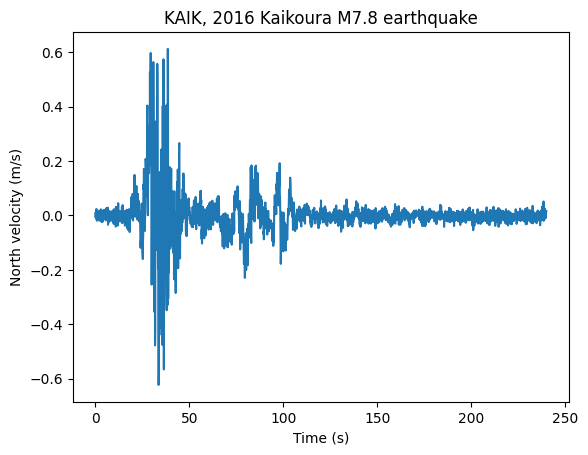

In [57]:
#Lets now plot the time against the north velocity, add x and y axis labels, and a title
dt = tval-tval[0] #I want to subtract the first time point here so it starts at 0
plt.plot(dt,nvel)
plt.xlabel('Time (s)')
plt.ylabel('North velocity (m/s)')
plt.title('KAIK, 2016 Kaikoura M7.8 earthquake')

Text(0.5, 1.0, 'KAIK, 2016 Kaikoura M7.8 earthquake')

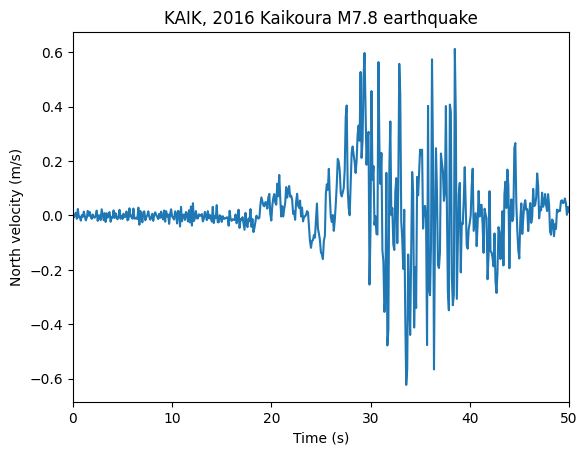

In [58]:
#Looking at this, I want to zoom into the first 50 seconds. I can plot it and set the x axis limit (xlim)
plt.plot(dt,nvel)
plt.xlim((0,50))
plt.xlabel('Time (s)')
plt.ylabel('North velocity (m/s)')
plt.title('KAIK, 2016 Kaikoura M7.8 earthquake')

Text(0.5, 1.0, 'KAIK, 2016 Kaikoura M7.8 earthquake')

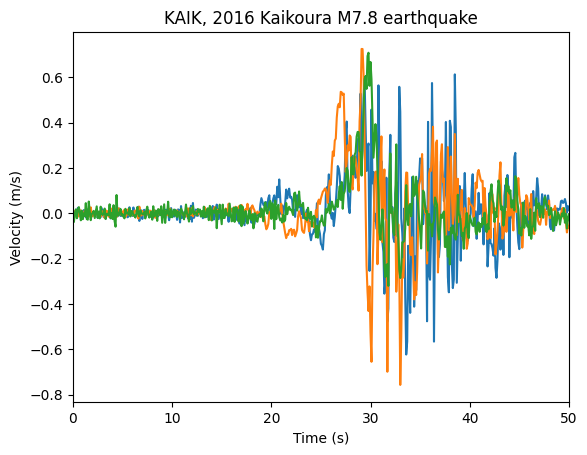

In [60]:
#Lets now make a version with all 3 components of motion
plt.plot(dt,nvel,dt,evel,dt,uvel)
plt.xlim((0,50))
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.title('KAIK, 2016 Kaikoura M7.8 earthquake')

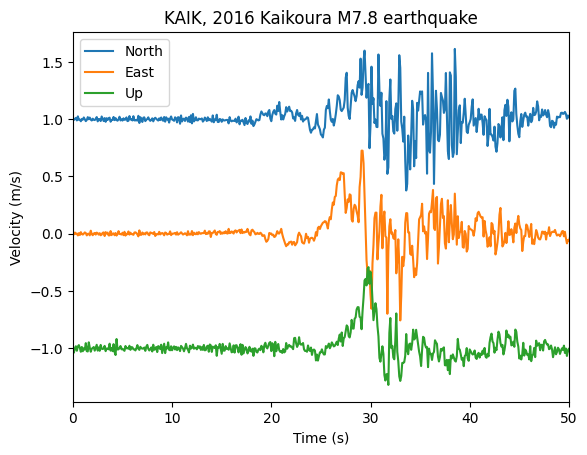

In [64]:
#Since these are all on top of each other, lets offset the first graph by 1, keep the second centered on 0 and the third at -1
plt.plot(dt,nvel+1,dt,evel,dt,uvel-1)
plt.xlim((0,50))
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.title('KAIK, 2016 Kaikoura M7.8 earthquake')
plt.legend(["North","East","Up"]) #Added a legend, can also use the plt.text function to annotate.

Now I want to know what the maximum values for each component are. For this, I will use the numpy.max and numpy.absolute commands since I don't care if the motion is positive or negative.

In [66]:
nmax = numpy.max(numpy.absolute(nvel))
emax = numpy.max(numpy.absolute(evel))
umax = numpy.max(numpy.absolute(uvel))
print(nmax, emax, umax)

0.62309 0.75715 0.70774


Now, rather than the maximum, I want to know the first time that the time series exceeded a certain threshold value, say 10 cm/s (0.1 m/s). For this, I will use numpy.where, but choose the first index point.

In [67]:
a1 = numpy.where(numpy.absolute(nvel) >= 0.1)[0]
print(dt[a1[0]]) #I am printing the time in which the first instance of the velocity being greater than 0.1 is seen

20.59999990463257


Now lets do a search across two variables. We want to know at which point nvel >= 0.1 and evel >= 0.3. We still use numpy.where, but have a dual conditional

In [70]:
a1 = numpy.where((numpy.absolute(nvel) >= 0.1) & (numpy.absolute(evel) >= 0.3))[0]
print(dt[a1[0]])

26.59999990463257


So in this case, it takes an extra 6 seconds for both conditions to be met.